In [4]:
import os
import numpy as np
from matplotlib import pyplot as mp
import cv2 as cv
from scipy import integrate, interpolate as interp
from jupyterthemes import jtplot

In [32]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}", r"\usepackage{url}"]

In [29]:
def BGR2xyzbar(im):
    A = np.array([[0.49000, 0.31000, 0.20000],
                  [0.17697, 0.81240, 0.01063],
                  [0.00000, 0.01000, 0.99000]], 'float32')
    im 
    x = np.array([r, g, b])
    return A @ x

def spec2xyz(spectrum, fbar):
    XYZ = []
    for i in range(len(fbar)):
        integrand = spectrum*fbar[i]
        if type(spectrum) not in [list, np.ndarray]:
            integral = integrand
        else:
            integral = integrate.trapz(integrand, spectrum)
        XYZ.append(integral)
    I = np.sum(XYZ)
    x = XYZ[0]/I
    y = XYZ[1]/I
    z = XYZ[2]/I
    return x, y, z

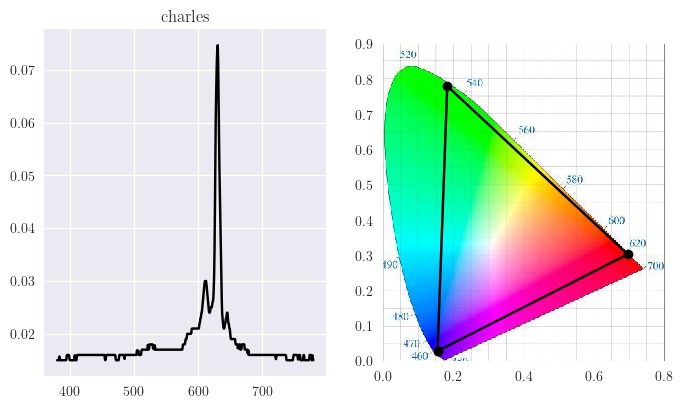

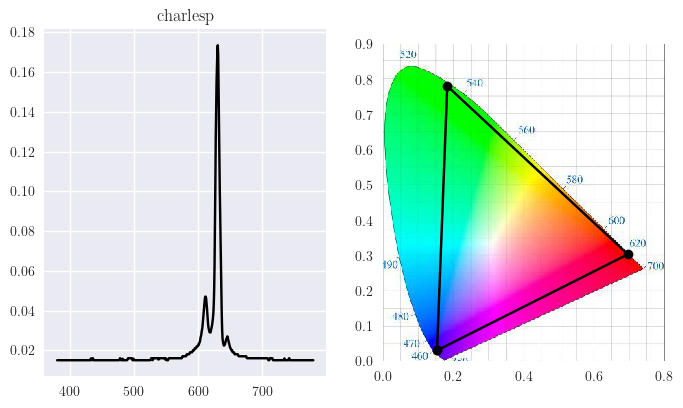

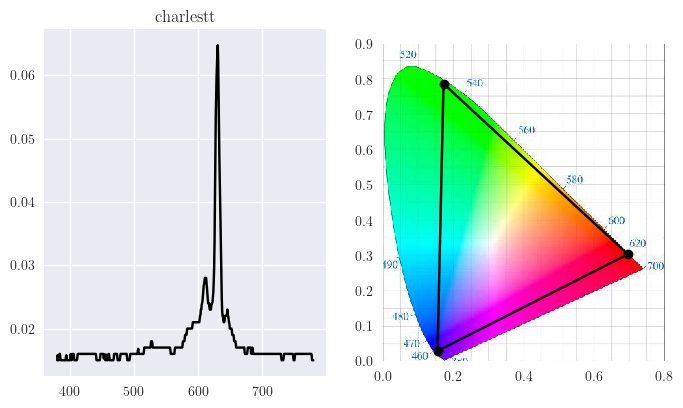

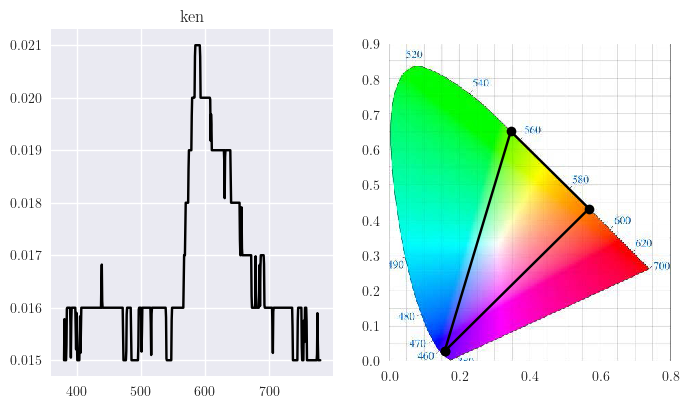

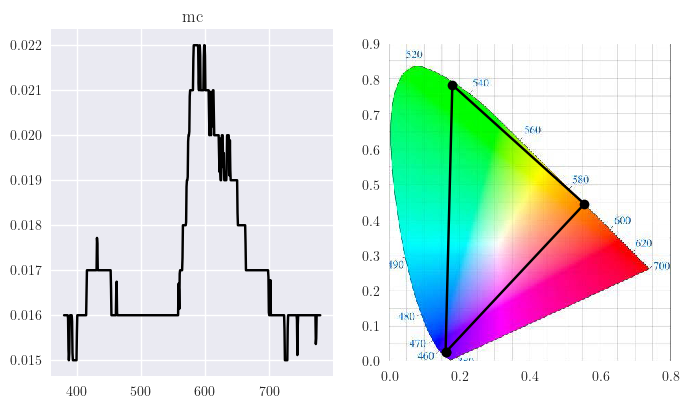

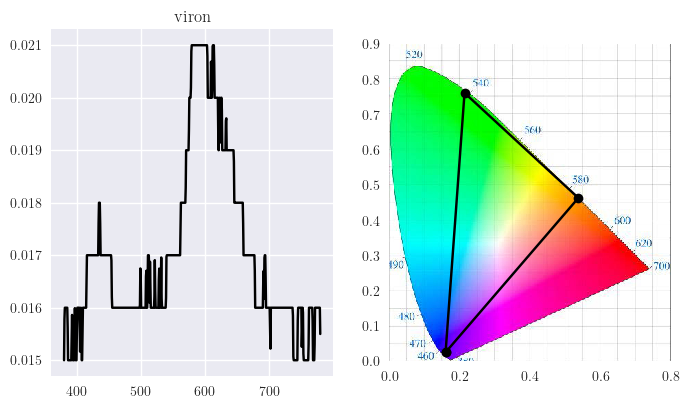

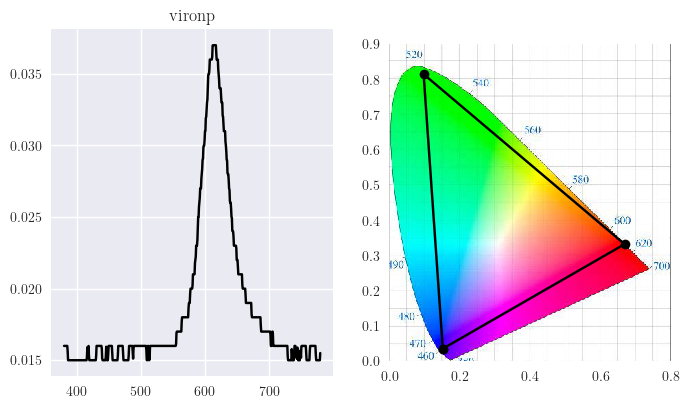

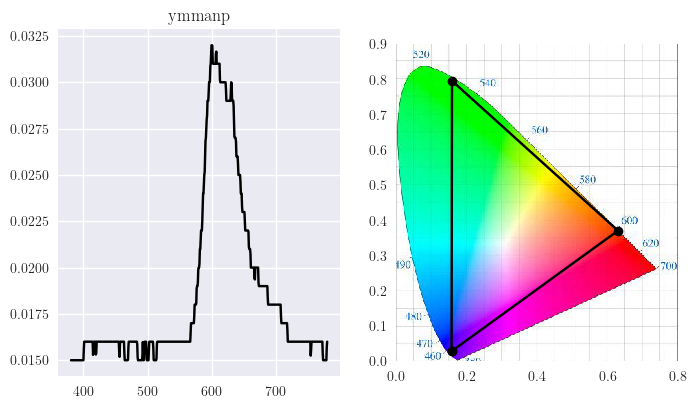

In [34]:
filenames = os.listdir()
prefix = ['charles_', 'charlesp_', 'charlestt_', 'ken_', 'mc_', 'viron_', 'vironp_', 'ymmanp_']
ciexy = mp.imread('ciexy.jpg')
cie_wl, xbar, ybar, zbar = np.genfromtxt('cie1964.csv', delimiter=',', unpack=True)

for p in prefix:
    boundx, boundy = [], []
    for file in filenames:
        if file.startswith(p):
            wavelength, intensity = np.genfromtxt(file, unpack=True)

            overall_wlmin = max(cie_wl.min(), wavelength.min())
            overall_wlmax = min(cie_wl.max(), wavelength.max())
            overall_wllen = max(cie_wl.size, wavelength.size)

            xbar_interp = interp.interp1d(cie_wl, xbar)
            ybar_interp = interp.interp1d(cie_wl, ybar)
            zbar_interp = interp.interp1d(cie_wl, zbar)
            spec_interp = interp.interp1d(wavelength, intensity)

            wavelength = np.linspace(overall_wlmin, overall_wlmax, overall_wllen)
            intens = spec_interp(wavelength)
            xi = xbar_interp(wavelength)
            yi = ybar_interp(wavelength)
            zi = zbar_interp(wavelength)
            
            i = np.argmax(intens)
            x, y, _ = spec2xyz(intens[i], [xi[i], yi[i], zi[i]])
            boundx.append(x)
            boundy.append(y)

    fig = mp.figure(figsize=(16/2, 9/2))
    ax = fig.add_subplot(121)
    ax.plot(wavelength, intens, 'k-')
    p = p[:-1]
    ax.set_title(p)

    ax = fig.add_subplot(122)
    boundx.append(boundx[0])
    boundy.append(boundy[0])
    ax.imshow(ciexy, extent=(0.0, 0.8, 0.0, 0.9))
    ax.plot(boundx, boundy, 'ko-')
    ax.grid(0)
    mp.show()